# Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook

*What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?*

Random networks predict that everyone has nearly the same number of connections, with little variation.
In reality, some individuals have more connections than average.
This shows that random networks underestimate the spread of connections and cannot explain the presence of very highly connected people.


*List the four regimes that characterize random networks as a function of <k>.*


- **Subcritical Regime (⟨k⟩ < 1)**
  The network is mostly tiny pieces, small groups and isolated nodes. No large connected part exists.

- **Critical Point (⟨k⟩ ≈ 1)**
  This is the tipping point. A giant cluster suddenly starts to appear in the network.

- **Supercritical Regime (1 < ⟨k⟩ < ln N)**
  A big cluster exists, but some small groups and isolated nodes still remain.

- **Connected Regime (⟨k⟩ > ln N)**
  Nearly every node belongs to the same large cluster, so the network is almost fully connected.

*According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?*

Because in real networks C(k) decreases with k, highly connected nodes link many groups together, while random networks miss this structure by predicting no such.


# WS edition


*First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity P = 0, 0.1, and 1. Calculate the average shortest path length <d> for each one.*

In [1]:
import networkx as nx

n = 500 # number of nodes
k = 4 # each node is joined with its k nearest neighbors
probs = [0, 0.1, 1]

results = {}
for p in probs:
    G = nx.watts_strogatz_graph(n, k, p)
    avg_shortest_path = nx.average_shortest_path_length(G)
    results[p] = avg_shortest_path

results


{0: 62.875751503006015, 0.1: 8.325779559118237, 1: 4.790204408817635}

*Describe what happens to the network when p = 1*

When p = 1 the network is fully randomized: every edge is rewired at random.
The graph loses its lattice structure and becomes similar to an Erdős–Rényi random graph, with very short path lengths but little local clustering.

*Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p = 0. What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network.*

In [2]:
import numpy as np

# Sweep through many p values
p_values = np.logspace(-4, 0, 15)  # from 0.0001 to 1, logarithmic spacing
avg_paths = []

for p in p_values:
    G = nx.watts_strogatz_graph(n, k, p)
    avg_paths.append(nx.average_shortest_path_length(G))

# Find the smallest p where path length is within ~10% of the p=1 case
p1_value = results[1]
threshold = 1.1 * p1_value
close_idx = next(i for i, val in enumerate(avg_paths) if val <= threshold)
p_close = p_values[close_idx]


In [3]:
import pandas as pd

df = pd.DataFrame({
    "p": p_values,
    "avg_shortest_path_length": avg_paths
})

print(df)

           p  avg_shortest_path_length
0   0.000100                 38.719768
1   0.000193                 48.594661
2   0.000373                 62.875752
3   0.000720                 62.875752
4   0.001389                 62.875752
5   0.002683                 32.021908
6   0.005179                 28.549491
7   0.010000                 21.411816
8   0.019307                 16.116385
9   0.037276                 10.199848
10  0.071969                  8.632705
11  0.138950                  6.669427
12  0.268270                  5.703639
13  0.517947                  4.966036
14  1.000000                  4.758525


By generating many networks for different values of p, we see that the average shortest path length quickly drops.
It gets close to the fully randomized case (p = 1) already around **p ≈ 0.5**.

*Let's investigate this behavior in detail. Generate 50 networks with N = 500, <k> = 4, for each of p = {0,0.01,0.03,0.04,0.1,0.2}. Calculate the average of <d> as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.*

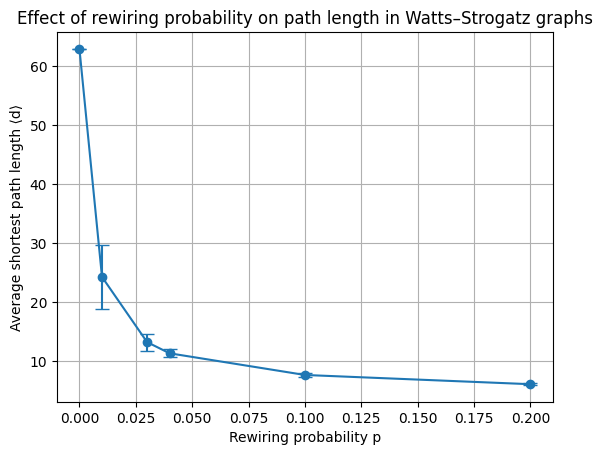

In [4]:
import matplotlib.pyplot as plt

# Parameters
N = 500
k = 4
p_values = [0, 0.01, 0.03, 0.04, 0.1, 0.2]
num_runs = 50

means = []
stds = []

for p in p_values:
    lengths = []
    for _ in range(num_runs):
        G = nx.watts_strogatz_graph(N, k, p)
        lengths.append(nx.average_shortest_path_length(G))
    means.append(np.mean(lengths))
    stds.append(np.std(lengths))

# Plot with error bars
plt.errorbar(p_values, means, yerr=stds, fmt='o-', capsize=5)
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length ⟨d⟩")
plt.title("Effect of rewiring probability on path length in Watts–Strogatz graphs")
plt.grid(True)
plt.show()


# BA edition

*What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).*


Complex networks with power-law degree distributions show three slope-dependent regimes, depending on the value of the exponent γ in P(k) ~ k^(-γ):

1. **γ > 3 (Weakly scale-free)**
   The degree distribution has a well-defined average and variance. Hubs are rare, and the network looks more like a classical random graph.

2. **2 < γ < 3 (Scale-free)**
   The average degree is finite, but the variance diverges. This means there can be extremely highly connected nodes, and the network is strongly dominated by them.

3. **1 < γ < 2 (Ultra-scale-free)**
   Even the average degree diverges as the network grows. A few nodes grab an enormous fraction of all links, leading to extreme inequality in connectivity.


*What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.*

Non-linear preferential attachment leads to three regimes, depending on how strongly the attachment probability grows with node degree:

1. **Sublinear attachment (α < 1)**
   High degree nodes have less advantage. The network becomes more homogeneous, with degrees spread narrowly and no dominant nodes.

2. **Linear attachment (α = 1)**
   This is the classic scale-free case. The network follows a power-law degree distribution, with a few very highly connected nodes and many low-degree ones.

3. **Superlinear attachment (α > 1)**
   A "winner-takes-all" effect appears. One nodes capture a giant share of all links, creating a star-like network dominated by a single hub.


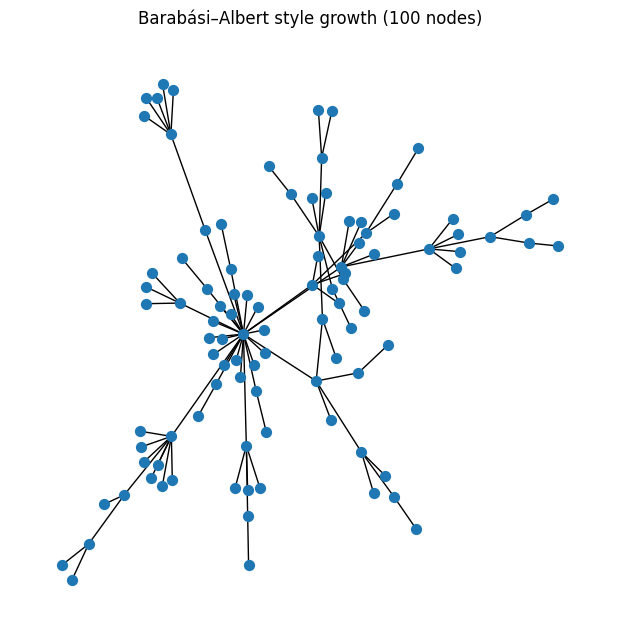

Max degree: 104
Min degree: 1


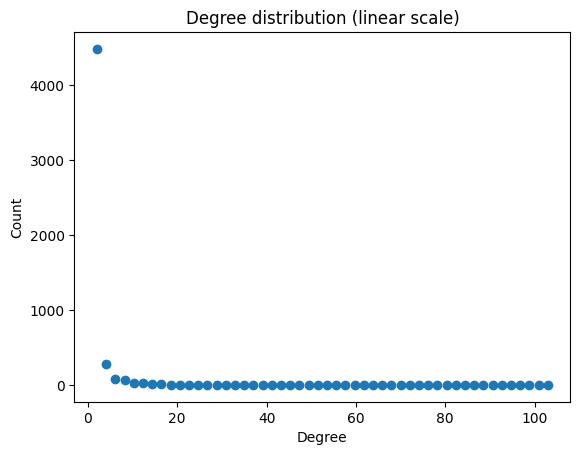

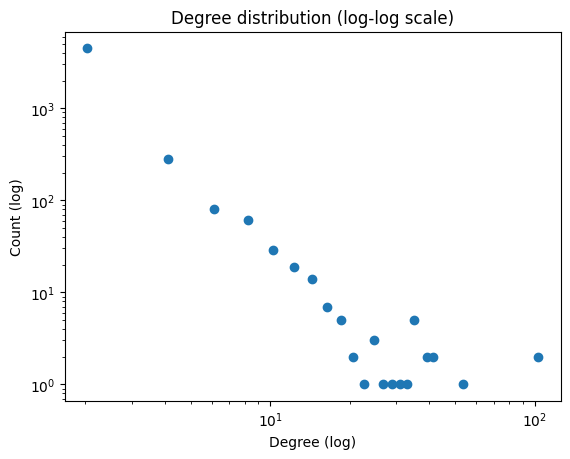

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Step 1: Start with a single link
G = nx.Graph()
G.add_edge(0, 1)  # initial two nodes with one edge


# Step 2: Function to pick a node proportional to its degree 
def choose_node_by_degree(G):
    """
    Selects a node with probability proportional to its degree.
    Creates a list of nodes where each node appears as many times as its degree.
    Then picks randomly from this list.
    """
    nodes_by_degree = []
    for node, degree in G.degree():
        nodes_by_degree.extend([node] * degree)
    return random.choice(nodes_by_degree)


# Step 3: Grow the network to 100 nodes 
for new_node in range(2, 100):
    target = choose_node_by_degree(G)
    G.add_edge(new_node, target)

# Plot the small network (100 nodes)
plt.figure(figsize=(6, 6))
nx.draw(G, node_size=50, with_labels=False)
plt.title("Barabási–Albert style growth (100 nodes)")
plt.show()

# Step 4: Grow to 5000 nodes 
for new_node in range(100, 5000):
    target = choose_node_by_degree(G)
    G.add_edge(new_node, target)

# Step 5: Maximum and minimum degree 
degrees = [deg for _, deg in G.degree()]
print("Max degree:", max(degrees))
print("Min degree:", min(degrees))

# Step 6: Degree distribution as scatter plots 
hist, bin_edges = np.histogram(degrees, bins=50)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Linear scatter plot
plt.scatter(bin_centers, hist, marker='o')
plt.xlabel("Degree")
plt.ylabel("Count")
plt.title("Degree distribution (linear scale)")
plt.show()

# Log-log scatter plot
plt.scatter(bin_centers, hist, marker='o')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree (log)")
plt.ylabel("Count (log)")
plt.title("Degree distribution (log-log scale)")
plt.show()
